In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("amazon_cells_labelled.txt",sep = '\t',header = None,names = ['review','sentiment'])

In [ ]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [ ]:
print(df['review'].dtype)

object


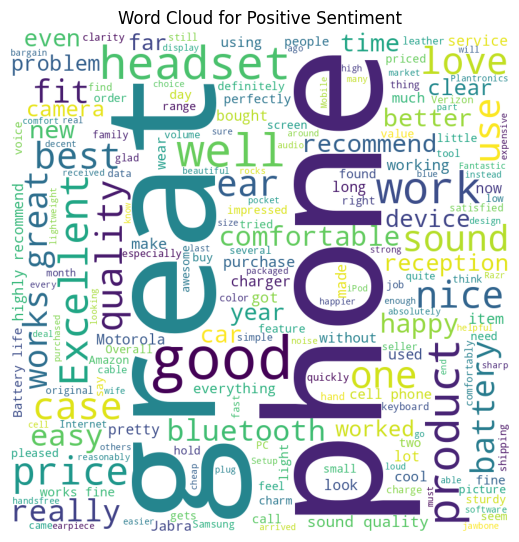

In [ ]:
positive_subset = df[df['sentiment'] == 1]
# Concatenate text data into a single string
positive_text = ' '.join(positive_subset['review'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Sentiment')
plt.show()

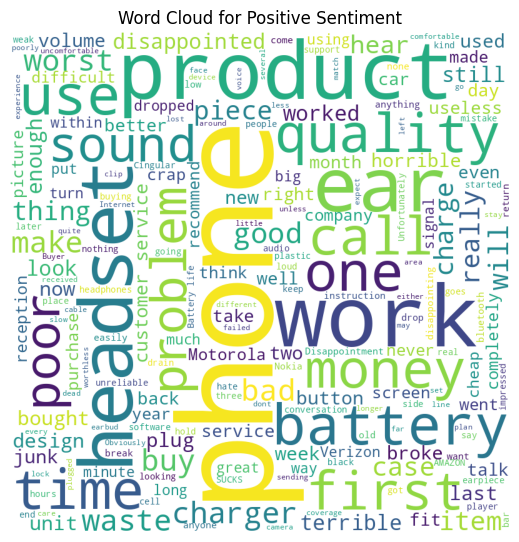

In [ ]:
neg_subset = df[df['sentiment'] == 0]
# Concatenate text data into a single string
neg_text = ' '.join(neg_subset['review'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neg_text)

# Display the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Sentiment')
plt.show()

In [ ]:
! cat custom_tokenizer_function.py

import spacy
nlp = spacy.load('en_core_web_sm')

import string
punct = string.punctuation
# punct

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopwords

class CustomTokenizer():
    def __init__(self):
        pass

    def text_data_cleaning(self,sentence):
        doc = nlp(sentence)                         # spaCy tokenize text & call doc components, in order

        tokens = [] # list of tokens
        for token in doc:
            if token.lemma_ != "-PRON-":
                temp = token.lemma_.lower().strip()
            else:
              temp = token.lower_
            tokens.append(temp)

        cleaned_tokens = []
        for token in tokens:
            if token not in stopwords and token not in punct:
                cleaned_tokens.append(token)
        return cleaned_tokens

In [ ]:
from custom_tokenizer_function import CustomTokenizer

In [ ]:
token = CustomTokenizer()
token.text_data_cleaning("This product is amazing")

['product', 'amazing']

In [ ]:
x = df['review']
y = df['sentiment']

In [ ]:
tfidf = TfidfVectorizer(tokenizer=token.text_data_cleaning)

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = df.sentiment, random_state=0)

In [ ]:
x_train.shape, x_test.shape

((800,), (200,))

In [ ]:
lr_model =LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)

In [ ]:
pipeline = Pipeline([('tfidf', tfidf),('lr_model', lr_model)])

In [ ]:
# Fit the TF-IDF vectorizer to the training data
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<bound method CustomTokenizer.text_data_cleaning of <custom_tokenizer_function.CustomTokenizer object at 0x7bca5f6cf550>>)),
                ('lr_model', LogisticRegression(C=10, max_iter=200))])

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.76      0.81      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
# Predict on training data
train_predictions = pipeline.predict(x_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.985


In [ ]:
test_predictions = pipeline.predict(x_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.78


In [ ]:
# Convert TF-IDF transformed data back to text format
text3_str = ["This is very Good Product."]  # Adjust as needed, this should match the original text

# Now you can pass text3_str to the pipeline's predict method
predictions = pipeline.predict(text3_str)
print(text3_str)

['This is very Good Product.']


In [ ]:
print(" - Predicted as: '{}'".format(predictions[0]))

 - Predicted as: '1'


In [ ]:
# Convert TF-IDF transformed data back to text format
text4_str = ["This is very bad Product."]  # Adjust as needed, this should match the original text

# Now you can pass text3_str to the pipeline's predict method
predictions = pipeline.predict(text4_str)
print(text4_str)

['This is very bad Product.']


In [ ]:
print(" - Predicted as: '{}'".format(predictions[0]))

 - Predicted as: '0'


In [ ]:
import joblib
joblib.dump(pipeline,'lr_model_pipeline.pkl')

In [168]:
prediction = pipeline.predict(["Athoudh the cost is high but product quality is good"])

if prediction == 1:
  print("This is positive sentiment")
else:
  print("This is negative sentiment")

This is positive sentiment
